In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
diabetes = pd.read_csv("pima-indians-diabetes.data.csv")

In [3]:
diabetes


,preg,plas,pres,Skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


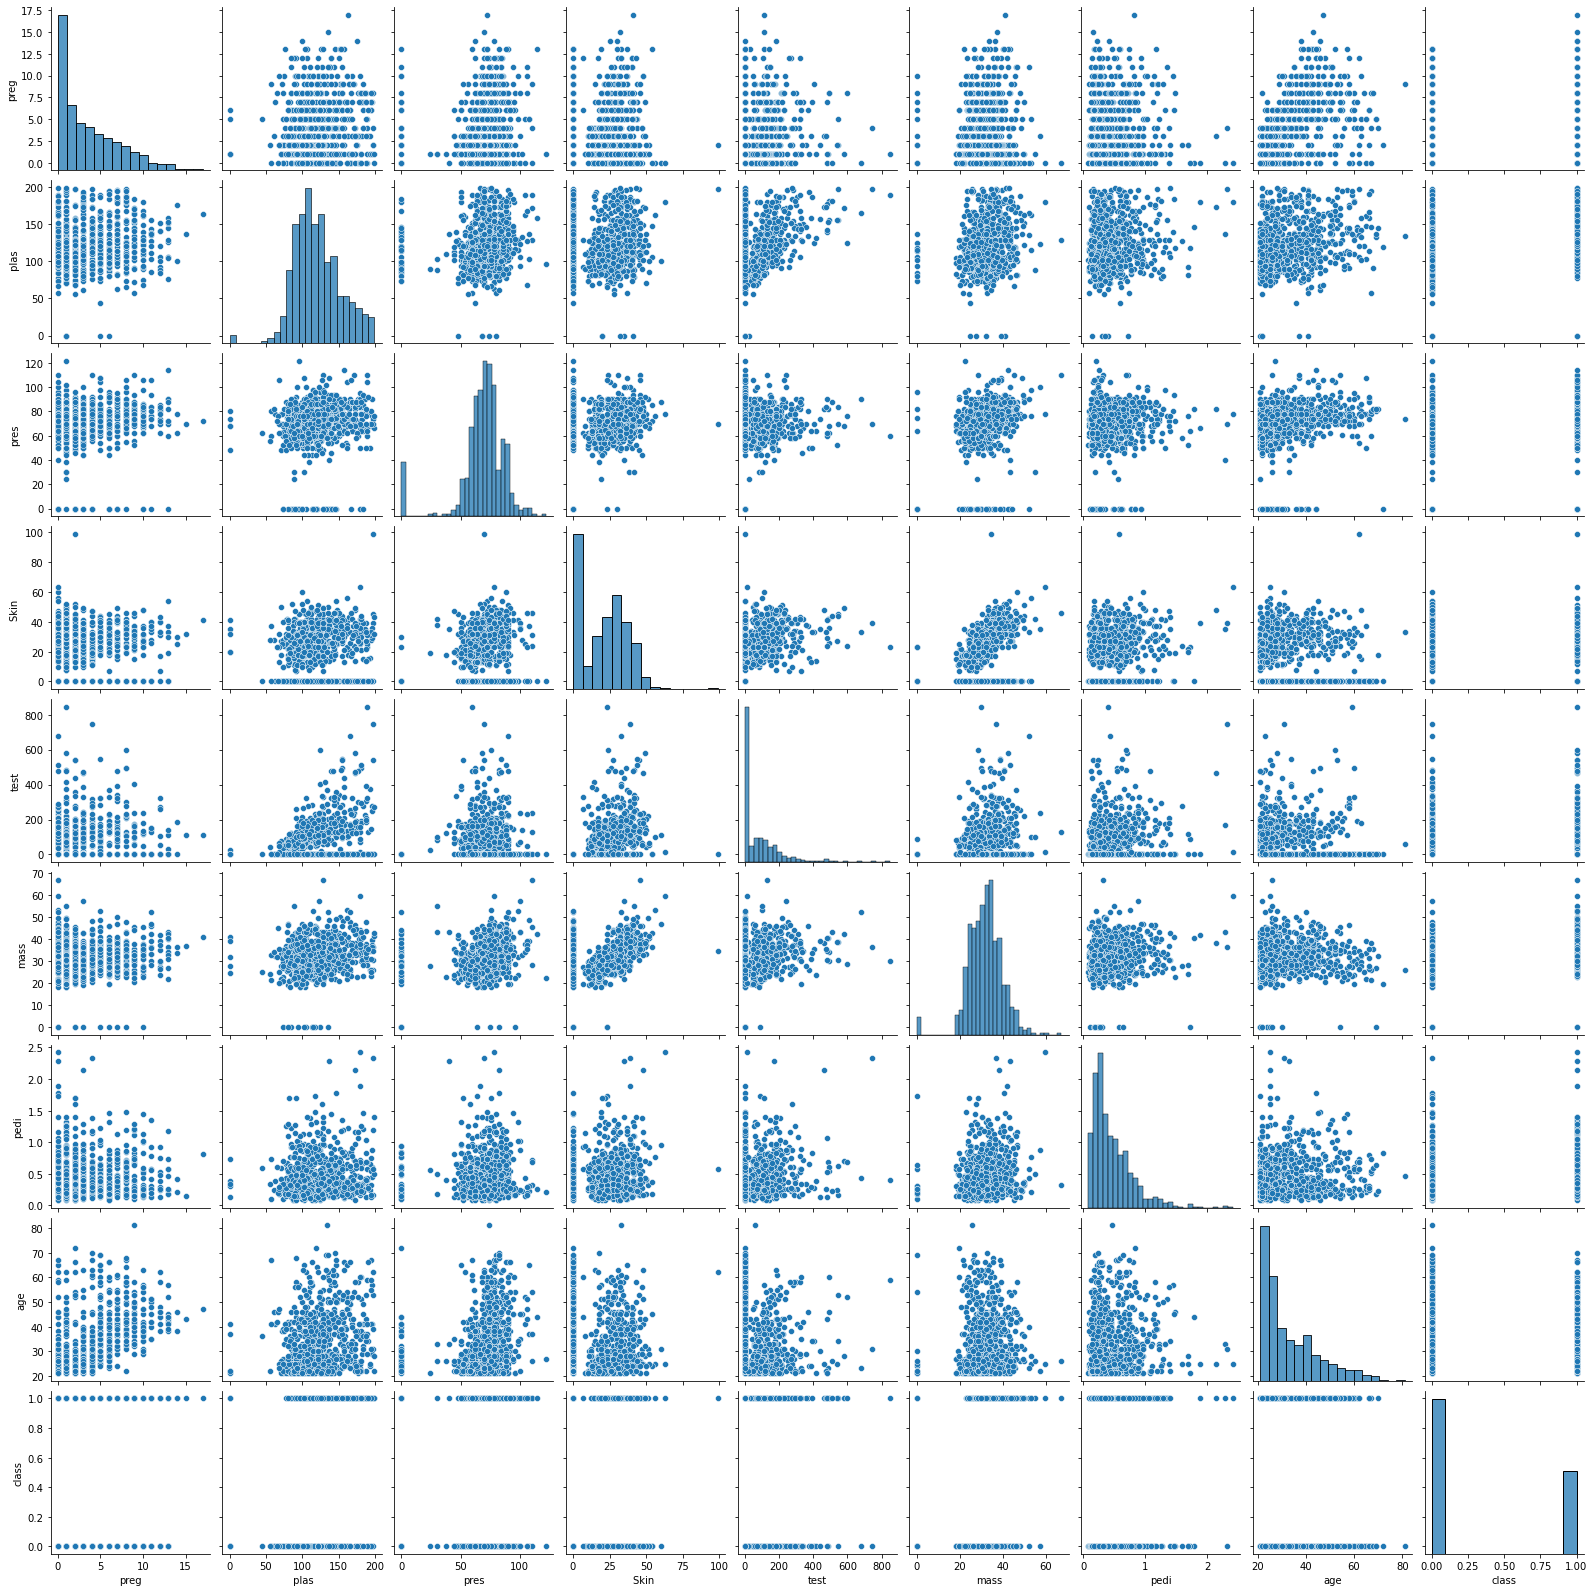

In [4]:
import seaborn as sns
sns.pairplot(diabetes)

<AxesSubplot:>

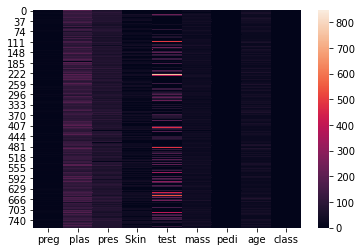

In [5]:
sns.heatmap(diabetes)

In [6]:
diabetes.isnull().any()

preg     False
 plas    False
pres     False
Skin     False
test     False
mass     False
pedi     False
age      False
class    False
dtype: bool

In [7]:
diabetes.isna().any()

preg     False
 plas    False
pres     False
Skin     False
test     False
mass     False
pedi     False
age      False
class    False
dtype: bool

In [8]:
diabetes.dtypes

preg       int64
 plas      int64
pres       int64
Skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [83]:
x = diabetes.iloc[ : , :8 ].values
y = diabetes.iloc[ : , 8: ].values

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.01, random_state = 0)

In [87]:
y_test

array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1]], dtype=int64)

In [88]:
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
x_train=sc1.fit_transform(x_train)
x_test = sc1.transform(x_test)

In [89]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [90]:
y_pred

array([[ 1.00010858],
       [ 0.20048158],
       [ 0.1113809 ],
       [ 0.59094431],
       [ 0.1560517 ],
       [-0.0668634 ],
       [ 0.69002421],
       [ 0.76509403]])

In [97]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7999931027349338

In [99]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_pred.round())

1.0

In [92]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [93]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
cm

array([[4, 0],
       [0, 4]], dtype=int64)

In [94]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred.round())
roc_auc = metrics.auc(fpr, tpr)
roc_auc

1.0

In [103]:
import pickle
pickle.dump(model, open('diabetesmodel', 'wb'))

In [104]:
from flask import Flask, render_template, request, jsonify


In [105]:
app=Flask(__name__) 
@app.route('/') 
def man():
    return render_template('index.html')
@app.route('/result' , methods=['POST'])
def Diabetes():
    x_test = [[int(x) for x in request.form.values()]]
    prediction=model.predict(x_test)
    print(prediction)
   
    return render_template('index.html') 


if __name__=='__main__':
        app.debug=True  
        app.run(host='127.0.0.1', port = 5000 ) 
        

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with windowsapi reloader


SystemExit: 1

C:\Users\MANIKANDAN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
